In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [32]:
test_dict = {0:[1,5,7,9],1:[2,4,3],2:[8,6,10],3:[11,12,13,14],4:[15,16]}


In [33]:
thing = np.array(list(test_dict.values()),dtype=object)

In [34]:
f = lambda x: len(x)
f_vec = np.vectorize(f)

In [38]:
len_arr = f_vec(thing)
lengths = set(len_arr)
print(lengths)

{2, 3, 4}


(array([1., 2., 2.]),
 array([2.        , 2.66666667, 3.33333333, 4.        ]),
 <BarContainer object of 3 artists>)

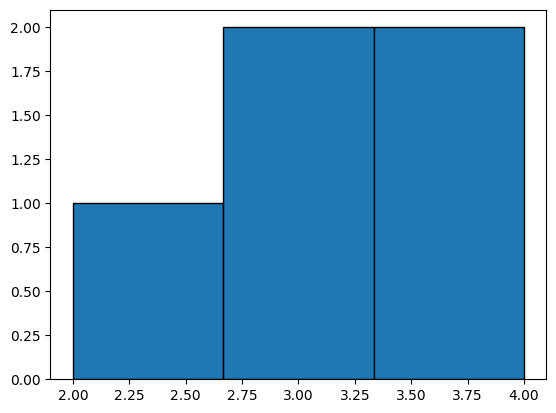

In [48]:
# hopefully this is faster with some broadcasting and vectorized functions
hist_dict = {}
for length in lengths:
    mask = len_arr == length
    hist_dict[length] = sum(mask)

hist_dict
plt.hist(lengths,weights=hist_dict.values(),bins=(len(lengths)),edgecolor="black")

In [36]:
arr[arr==4]

array([4, 4])

In [ ]:
# Need three things:
# 1) counted

## Checking if LEP's can be grouped differently

Test1

In [2]:
test_arr = np.array([[0,0,0,1,0,1,0,1,1,1,1,0,0],
                [0,0,1,0,1,0,1,0,1,1,1,0,0],
                [0,1,0,1,0,1,0,1,1,0,0,1,1],
                [1,0,1,0,1,0,1,0,0,1,0,1,1],
                [0,1,0,1,0,1,0,1,0,0,1,1,1],
                [1,0,1,0,1,0,1,0,1,0,0,1,1],
                [0,1,0,1,0,1,0,1,0,1,0,1,1],
                [1,0,1,0,1,0,1,0,0,0,1,1,1],
                [1,1,1,0,0,1,0,0,0,1,0,0,0],
                [1,1,0,1,0,0,1,0,1,0,1,0,0],
                [1,1,0,0,1,0,0,1,0,1,0,0,0],
                [0,0,1,1,1,1,1,1,0,0,0,0,1],
                [0,0,1,1,1,1,1,1,0,0,0,1,0]])
import networkx as nx

In [157]:
def graphWithColoredPartEl(adj_mat, ep):
    """draws the nx graph with color coded partition elements for the coursest EP
    if given a permuted adjacency matrix
    
    ARGUMENTS
    =========
    ep (dict): containts the nodes in each partition element"""
    hexColors = list(matplotlib.colors.cnames.values())  #get hex colors
    colorArr = [0 for i in range(max(max(ep.values()))+1)] #create place to store node colors
    index = 0    #start node index as 9
    for partEl in ep.values():   #cycle through each partition element
        color = random.randint(0,147)   #get a random color to assign to this partition element
        for i in range(len(partEl)):   #cycle through all nodes in partition element
            colorArr[index] = hexColors[color]   #assign each node that color
            index+=1   #use this to get different colorArr position each time
            
    nx.draw_networkx(nx.from_numpy_array(adj_mat),node_color=colorArr)    #graph it with colors

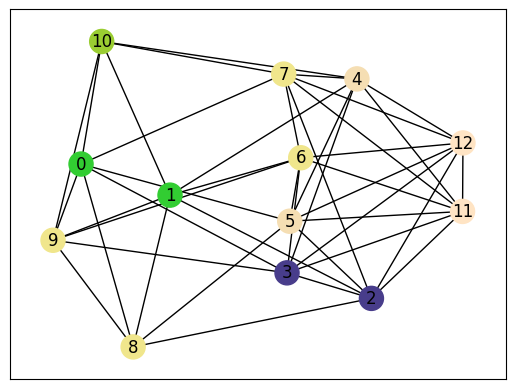

In [158]:
#nx.draw(test_graph)
graphWithColoredPartEl(test_arr,ep_dict)

In [4]:
import os
os.chdir('..')
import graphs, ep_utils
import matplotlib
import random

In [6]:
test_graph = nx.from_numpy_array(test_arr)

In [8]:
ep_dict,lep_list = ep_utils.getEquitablePartitions(test_graph)

COMPUTING LEPS...  |████████████████████████████████████████| 19/19 [100%] in 0.0s (96847.36/s) 


In [9]:
ep_dict

{0: [8, 10], 1: [0, 1], 2: [11, 12], 3: [2, 4, 5, 7], 4: [9], 5: [3, 6]}

In [10]:
lep_list

[{0, 1, 3, 5}, {2}, {4}]

Test 1 -> it grouped all together even though some were externally consistent with each. Might be based on the grouping. Now investigating with switching things around.

Test2

In [164]:
def permute(graph,ep_dict):
    I = np.eye(max(max(ep_dict.values()))+1)
    print(I.shape)
    perm = np.zeros_like(I)
    index = 0
    for node_list in ep_dict.values():
        print(node_list)
        for node in node_list:
            perm[index,:] = I[node]
            index+=1
    return graph@perm
        
new_arr = permute(test_arr,ep_dict)
new_graph = nx.from_numpy_array(new_arr)
ep,lep = ep_utils.getEquitablePartitions(new_graph)

(13, 13)
[8, 10]
[0, 1]
[11, 12]
[2, 4, 5, 7]
[9]
[3, 6]
COMPUTING LEPS...  |████████████████████████████████████████| 40/40 [100%] in 0.0s (107491.05/s) 


In [167]:
new_arr

array([[0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1.],
       [1., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0., 1.],
       [1., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 1., 0.],
       [0., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 1.],
       [1., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0.],
       [0., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1.],
       [1., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1.],
       [0., 1., 1., 0., 0., 1., 0., 0., 1., 1., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 0.],
       [1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1.],
       [1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1.]])

In [ ]:
test2 = np.zeros((13,13))
test2[2:5,2:5] = test[8:11,8:11]
test2[:2,2:5] = test[:2,8:11]
test2